1. Import Libraries

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats
import statsmodels.api as sm
from statsmodels.formula.api import ols

2. Load the dataset from a URL

In [2]:
url = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv'
boston_df = pd.read_csv(url)

3. Display descriptive statistics of the dataset

In [3]:
boston_df.describe()

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,252.500000,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,12.653063,22.532806
std,146.213884,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,7.141062,9.197104
min,0.000000,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,1.730000,5.000000
25%,126.250000,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,6.950000,17.025000
50%,252.500000,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,11.360000,21.200000
75%,378.750000,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,16.955000,25.000000
max,505.000000,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,37.970000,50.000000


4. Visualize the distribution of house prices

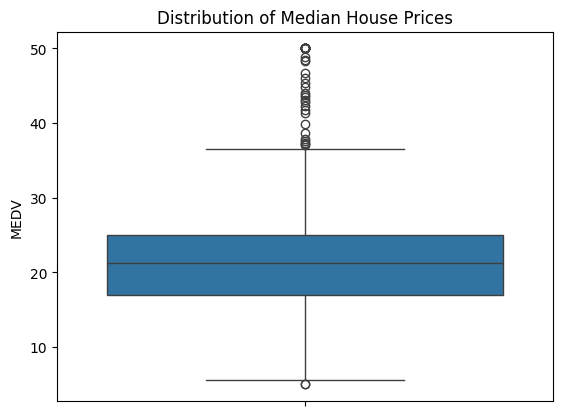

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt

ax = sns.boxplot(y='MEDV', data=boston_df)
ax.set_title('Distribution of Median House Prices')
plt.show()

5. Analyze the distribution of homes neear the Charles River

The CHAS column indicates whether a house is near the Charles River (1) or not (0). We can use a count plot to visualize this distribution.

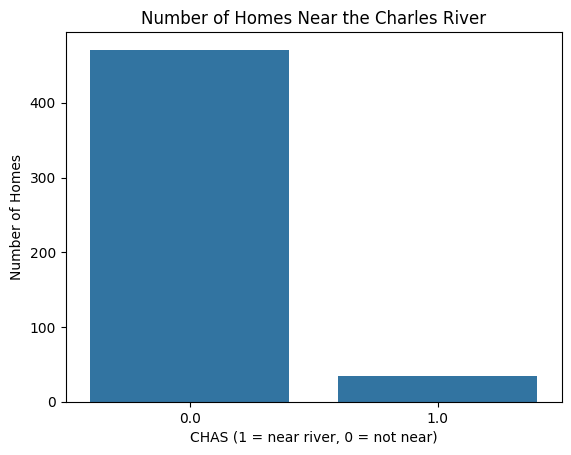

In [5]:
ax = sns.countplot(x='CHAS', data=boston_df)
ax.set_title('Number of Homes Near the Charles River')
plt.xlabel('CHAS (1 = near river, 0 = not near)')
plt.ylabel('Number of Homes')
plt.show()

This plot gives a simple visual breakdown of how many properties are located near the river versus those that are not, helping us see if proximity to the river is a common feature or not in the dataset.

6. Create Age Group Categories and Visualize Their Home Values

To better understand the relationship between the age of buildings (AGE) and the median value of homes (MEDV), we create three age group categories:

- 35 years and younger

- Between 35 and 70 years

- 70 years and older

In [6]:
boston_df.loc[boston_df['AGE'] <= 35, 'Age_Group'] = '35 years and younger'
boston_df.loc[(boston_df['AGE'] > 35) & (boston_df['AGE'] < 70), 'Age_Group'] = 'between 35 and 70 years'
boston_df.loc[boston_df['AGE'] >= 70, 'Age_Group'] = '70 years and older'

  Then we visualize the median home values across these age groups using a boxplot

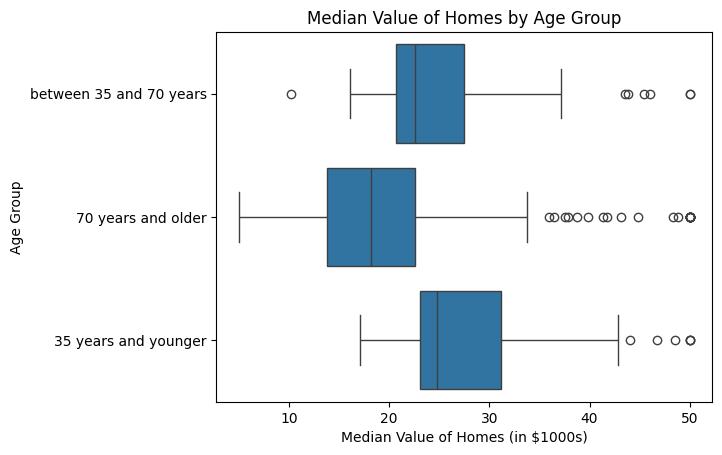

In [7]:
ax = sns.boxplot(x='MEDV', y='Age_Group', data=boston_df)
ax.set_title('Median Value of Homes by Age Group')
plt.xlabel('Median Value of Homes (in $1000s)')
plt.ylabel('Age Group')
plt.show()

This analysis helps us examine whether the age of properties has any significant association with their value.

7. Convert CHAS into Categorical Labels

The CHAS column indicates proximity to the Charles River, where 0 means the home is far and 1 means it is near. For clearer interpretation, we assign labels with these promt:

In [8]:
boston_df.loc[boston_df['CHAS'] == 0, 'CHAS_T'] = 'FAR'
boston_df.loc[boston_df['CHAS'] == 1, 'CHAS_T'] = 'NEAR'

8. Compare Home Values Based on River Proximity Using T-Test

To assess whether proximity to the Charles River significantly impacts home value, we conduct an independent two-sample t-test between the MEDV of homes near and far from the river.

In [9]:
from scipy import stats

stats.ttest_ind(
    boston_df[boston_df['CHAS_T'] == 'FAR']['MEDV'],
    boston_df[boston_df['CHAS_T'] == 'NEAR']['MEDV'],
    equal_var=True
)

TtestResult(statistic=np.float64(-3.996437466090509), pvalue=np.float64(7.390623170519905e-05), df=np.float64(504.0))

  This test evaluates whether the difference in mean MEDV between the two groups is statistically significant, helping us understand if living near the river commands a price premium.

9. Perform ANOVA to Evaluate the Relationship Between Age and MEDV

We now assess whether the age of the houses has a statistically significant effect on the median value of homes (MEDV). We use a one-way ANOVA (Analysis of Variance) to test this.

In [10]:
from statsmodels.formula.api import ols
import statsmodels.api as sm

lm = ols('MEDV ~ AGE', data=boston_df).fit()
table = sm.stats.anova_lm(lm)
print(table)

             df        sum_sq      mean_sq          F        PR(>F)
AGE         1.0   6069.761065  6069.761065  83.477459  1.569982e-18
Residual  504.0  36646.534350    72.711378        NaN           NaN


  This ANOVA table provides an F-statistic and a p-value. A small p-value (typically < 0.05) suggests that age has a statistically significant relationship with home value. The output helps us determine whether older or newer homes differ in terms of MEDV.



10. Compute Pearson Correlation Between NOX and INDUS

To assess the linear relationship between nitric oxide concentration (NOX) and proportion of non-retail business acres per town (INDUS), we use Pearson correlation.

In [11]:
import scipy.stats

scipy.stats.pearsonr(boston_df['NOX'], boston_df['INDUS'])

PearsonRResult(statistic=np.float64(0.7636514469209154), pvalue=np.float64(7.913361061239639e-98))

The output will return the Pearson correlation coefficient and the p-value. A coefficient close to +1 indicates a strong positive correlation, meaning as INDUS increases, NOX tends to increase. A significant p-value (typically less than 0.05) confirms that the correlation is statistically meaningful.

11. Simple Linear Regression Between DIS and MEDV

To evaluate how the distance to employment centers (DIS) influences housing prices (MEDV), we apply a simple linear regression.

In [12]:
import statsmodels.api as sm

x = boston_df['DIS']
y = boston_df['MEDV']

x = sm.add_constant(x)  # Adds a constant term to the predictor

model = sm.OLS(y, x).fit()
predictions = model.predict(x)

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     33.58
Date:                Wed, 30 Jul 2025   Prob (F-statistic):           1.21e-08
Time:                        13:51:14   Log-Likelihood:                -1823.9
No. Observations:                 506   AIC:                             3652.
Df Residuals:                     504   BIC:                             3660.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         18.3901      0.817     22.499      0.000      16.784      19.996
DIS            1.0916      0.188      5.795      0.000       0.722       1.462
==============================================================================
Omnibus:                      139.779   Durbin-Watson:                   0.570
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              305.104
Skew:                           1.466   Prob(JB):                     5.59e-67
Kurtosis:                       5.424   Cond. No.                         9.32
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

12. Interpreting the Overall Regression Model

From the regression summary, we gather crucial statistical indicators that help us understand the linear relationship between the distance to employment centers (DIS) and median home values (MEDV).

If the p-value for DIS is less than 0.05, this indicates that the relationship is statistically significant. The sign of the coefficient tells us the direction of the relationship: a negative coefficient would mean that as the distance increases, the home values tend to decrease, while a positive coefficient would suggest the opposite.

The R-squared value indicates the proportion of variance in MEDV explained by DIS. A higher R-squared means the model explains a greater amount of the variability, although in simple linear regression, it is often modest. This result wraps up the analysis by quantifying how much location relative to employment hubs matters in Boston housing prices.